In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Problem 2

In [11]:
# Part a)
def euro_put_estimate(S0, u, d, r, N, M, K):
    q = (1+r-d)/(u-d)
    U = np.random.uniform(size=M)
    S = np.zeros(M)
    payoff = np.zeros(M)

    for i in range(M):
        S[i] = S0*(u/d)**stats.binom.ppf(U[i], N, q)*d**N
        payoff[i] = (1/(1+r)**N)*max(K-S[i],0)

    price = np.average(payoff)
    ci = [price-1.96*np.std(payoff)/np.sqrt(M), price+1.96*np.std(payoff)/np.sqrt(M)]
    return [price, ci]

S0 = 50
u = 1.06
d = 0.98
r = 0.01
N = 26
M = 25
K = 60
print("The estimated price for this put is: " + str(euro_put_estimate(S0, u, d, r, N, M, K)[0]) + " with 95% confidence "
      "interval: " + str(euro_put_estimate(S0, u, d, r, N, M, K)[1]))

The estimated price for this put is: 2.6550808615718893 with 95% confidence interval: [0.9302771522787316, 3.852878916958636]


The true value of the put price is: 2.1235867663227928 with standard deviation: 3.6851920061217207


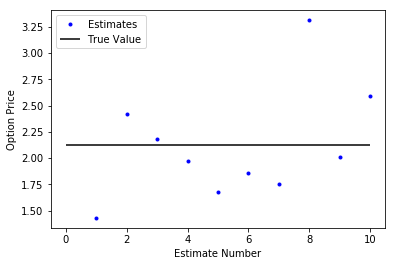

In [12]:
# Part b)
prices = np.zeros(10)
cis = []

for i in range(10):
    prices[i] = euro_put_estimate(S0, u, d, r, N, M, K)[0]
    cis.append(euro_put_estimate(S0, u, d, r, N, M, K)[1])
    
q = (1+r-d)/(u-d)
allS = [S0*(u/d)**i*d**N for i in range(N+1)]
true_price = np.sum([max(0, K-allS[i])*stats.binom.pmf(i, N, q) for i in range(N)])/(1+r)**N
true_price_sq = np.sum([max(0, K-allS[i])**2*stats.binom.pmf(i, N, q) for i in range(N)])/(1+r)**(2*N)
true_sd = np.sqrt(true_price_sq-true_price**2)
print("The true value of the put price is: " + str(true_price) + " with standard deviation: " + str(true_sd))

i = range(1, 11)
plt.plot(i, prices, 'b.')
plt.hlines(y=true_price, xmin=0, xmax=10)
plt.xlabel("Estimate Number")
plt.ylabel("Option Price")
plt.legend(["Estimates", "True Value"])
plt.show()

The estimated price for this put is: 0.5547455923546348 with 95% confidence interval: [-0.08353027995005186, 0.994478643275279]
The true value of the call price is: 0.8114443935649318 with standard deviation: 3.040950280803362


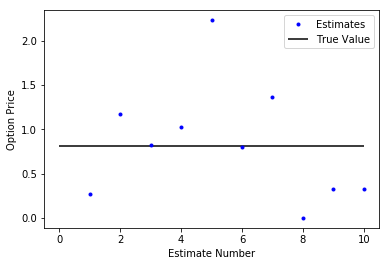

In [13]:
# Part c)
def euro_call_estimate(S0, u, d, r, N, M, K):
    q = (1+r-d)/(u-d)
    U = np.random.uniform(size=M)
    S = np.zeros(M)
    payoff = np.zeros(M)

    for i in range(M):
        S[i] = S0*(u/d)**stats.binom.ppf(U[i], N, q)*d**N
        payoff[i] = (1/(1+r)**N)*max(S[i]-K,0)

    price = np.average(payoff)
    ci = [price-1.96*np.std(payoff)/np.sqrt(M), price+1.96*np.std(payoff)/np.sqrt(M)]
    return [price, ci]

K = 80
print("The estimated price for this put is: " + str(euro_call_estimate(S0, u, d, r, N, M, K)[0]) + " with 95% confidence "
      "interval: " + str(euro_call_estimate(S0, u, d, r, N, M, K)[1]))

prices = np.zeros(10)
cis = []

for i in range(10):
    prices[i] = euro_call_estimate(S0, u, d, r, N, M, K)[0]
    cis.append(euro_call_estimate(S0, u, d, r, N, M, K)[1])
    
q = (1+r-d)/(u-d)
allS = [S0*(u/d)**i*d**N for i in range(N+1)]
true_price = np.sum([max(0, allS[i]-K)*stats.binom.pmf(i, N, q) for i in range(N)])/(1+r)**N
true_price_sq = np.sum([max(0, allS[i]-K)**2*stats.binom.pmf(i, N, q) for i in range(N)])/(1+r)**(2*N)
true_sd = np.sqrt(true_price_sq-true_price**2)
print("The true value of the call price is: " + str(true_price) + " with standard deviation: " + str(true_sd))

i = range(1, 11)
plt.plot(i, prices, 'b.')
plt.hlines(y=true_price, xmin=0, xmax=10)
plt.xlabel("Estimate Number")
plt.ylabel("Option Price")
plt.legend(["Estimates", "True Value"])
plt.show()

> This scenario is different from the other because the previous part was estimating the payoff for a put whereas this part is estimating that for a call. Since the strike is much higher than before, this causes there to be a higher probability of simulating zero payoffs which results in the average being lower than in the case for the put which has a lower strike price, but still a lower probability of producing zero payoffs. This results in a larger average payoff.

# Problem 3

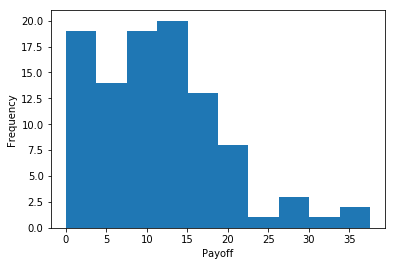

The sample mean and standard deviation of this sample is: 11.285375943275188 and 7.930010877504594 respectively.
The estimated price for this Lookback option is: 11.285375943275188 with 99% confidence interval: [9.239433136879002, 13.331318749671373]


In [7]:
K = 55
N = 30
M = 100

S = np.zeros((M, N+1))
S[:, 0] = S0
payoff = np.zeros(M)

for i in range(int(M/2)):
    AT = np.random.uniform(size=N)
    AT2 = 1-AT
    AT_path = u**(AT<q)*d**(AT>=q)
    AT2_path = u**(AT2<q)*d**(AT2>=q)
    
    S[2*i, 1:] = S0*np.cumprod(AT_path)
    S[2*i+1, 1:] = S0*np.cumprod(AT2_path)
    payoff[2*i] = (1/(1+r)**N)*max(np.amax(S[2*i, :])-K,0)
    payoff[2*i+1] = (1/(1+r)**N)*max(np.amax(S[2*i-1, :])-K,0)

plt.hist(payoff)
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.show()

price = np.average(payoff)
stdev = np.std(payoff)
print("The sample mean and standard deviation of this sample is: " + str(price) + " and " + str(stdev) + " respectively.")

ci = [price-2.58*stdev/np.sqrt(M), price+2.58*stdev/np.sqrt(M)]
print("The estimated price for this Lookback option is: " + str(price) + " with 99% confidence interval: " + str(ci))

# Problem 4

In [8]:
# Part a)
K = 45
sigma = 0.2
r = 0.04
T = 0.5
M = 25

Z = np.random.normal(size=M)
S = np.zeros(M)
payoff = np.zeros(M)

for i in range(M):
    S[i] = S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*Z[i])
    payoff[i] = np.exp(-r*T)*max(S[i]-K, 0)
    
price = np.average(payoff)
ci = [price-1.96*np.std(payoff)/np.sqrt(M), price+1.96*np.std(payoff)/np.sqrt(M)]
print("The estimated price for this call using the Black Scholes model is: " + str(price) + " with 95% confidence interval: "
      + str(ci))

d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
d2 = d1-sigma*np.sqrt(T)
true_price = S0*stats.norm.cdf(d1)-K*np.exp(-r*T)*stats.norm.cdf(d2)
percent_err = (abs(price-true_price)/true_price)*100
if(ci[0]<=true_price<=ci[1]):    
    print("The true price of the call according to the Black-Scholes model is: " + str(true_price) + " which is contained "
          "within the 95% confidence bounds. The estimate has a percent error of: " + str(percent_err) + "% with the actual "
          "value.")
else:
    print("The true price of the call according to the Black-Scholes model is: " + str(true_price) + " which is not " 
          "contained within the 95% confidence bounds. The estimate has a percent error of: " + str(percent_err) + "% with "
          "the actual value.")

The estimated price for this call using the Black Scholes model is: 6.199779577571021 with 95% confidence interval: [3.5001830674339285, 8.899376087708113]
The true price of the call according to the Black-Scholes model is: 6.573775055279903 which is contained within the 95% confidence bounds. The estimate has a percent error of: 5.689204065607594% with the actual value.


In [9]:
# Part b)
M = 25
u = np.linspace(0.02, 0.98, M)
S = np.zeros(M)
payoff = np.zeros(M)

for i in range(M):
    S[i] = S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*stats.norm.ppf(u[i]))
    payoff[i] = np.exp(-r*T)*max(S[i]-K,0)
    
price = np.average(payoff)
print("The estimated price for this call in the Black Scholes model using Quasi Monte Carlo sampling is: " + str(price))

The estimated price for this call in the Black Scholes model using Quasi Monte Carlo sampling is: 6.526476783089659


# Problem 5

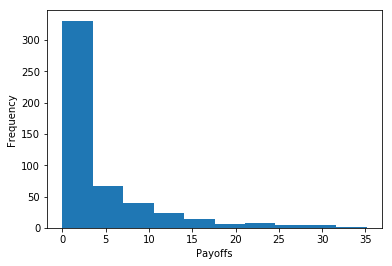

The estimated price for this basket option using the Black Scholes model is: 3.871604693035326 with 98% confidence interval: [3.2136641793249834, 4.529545206745669]


In [10]:
I = 5
r = 0.03
M = 500
T = 1

S0_vals = [10*i for i in range(1, I+1)]
volatilities = [0.1+0.05*i for i in range(1, I+1)]
Z = np.random.normal(size=M)
S = np.zeros((M, I))
payoff = np.zeros(M)

for j in range(I):
    S[:, j] = S0_vals[j]*np.exp((r-volatilities[j]**2/2)*T+volatilities[j]*np.sqrt(T)*Z)
        
for i in range(M):
    payoff[i] = np.exp(-r*T)*max((S[i, 0]+S[i, 1]+S[i, 2]+S[i, 3]+S[i, 4])/5-30, 0)
    
plt.hist(payoff)
plt.xlabel("Payoffs")
plt.ylabel("Frequency")
plt.show()

price = np.average(payoff)
ci = [price-2.33*np.std(payoff)/np.sqrt(M), price+2.33*np.std(payoff)/np.sqrt(M)]
print("The estimated price for this basket option using the Black Scholes model is: " + str(price) + " with 98% confidence "
      "interval: " + str(ci))